**Detecting Phishing Websites using Machine Learning and Python - Part 2: Further data investigation and preparing investigation reports**

In [0]:
# upgrading TensorFlow to avoid attribute error while setting the seed by using set_seed
pip install --upgrade tensorflow==2.0.0-rc1

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

# fixing the random seed for reproducibility
np.random.seed(11)
tf.random.set_seed(22)

# Saving the filepath of 'Phishing.csv' saved in the GitHub repository
filepath = "https://raw.githubusercontent.com/sayakpaul/Manning-Phishing-Websites-Detection/master/Phishing.csv"

# Loading the .csv into a DataFrame
phishing_data = pd.read_csv(filepath)


In [46]:
# import counter class from collections module 
from collections import Counter 

# Creation of a Counter Class object to extract the class distribution from the data in 'Result' column
class_info = Counter(phishing_data['Result'])

# Converting class-info into a pandas dataframe in the specified format
class_info = pd.DataFrame.from_dict(class_info, orient='index')
class_info = class_info.sort_values(0, ascending=False)
class_info = class_info.reset_index()
# Renaming the columns
class_info = class_info.rename(columns={'index':'Class', 0:'Num_Observations'})

print(class_info)



   Class  Num_Observations
0      1              6157
1     -1              4898


Text(0.5, 1.0, 'Class distributions of the websites')

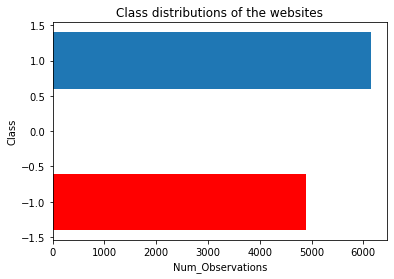

In [47]:
# Creating a simple bar plot to visualize the class distribution
import matplotlib.pyplot as plt

# Plotting separate bars for the two classes -1(red) and 1(blue)
plt.barh(class_info['Class'][0], class_info['Num_Observations'][0])
plt.barh(class_info['Class'][1], class_info['Num_Observations'][1], color='r')

# Setting the attributes like title and axes labels for the graph
plt.xlabel('Num_Observations')
plt.ylabel('Class')
plt.title('Class distributions of the websites')
